In [1]:
import pandas as pd

In [2]:
#speech_df1 = pd.read_csv('speech1.csv')

In [3]:
#speech_df2 = pd.read_csv('speech2.csv')
#speech_df3 = pd.read_csv('speech3.csv')

In [4]:
#speech_df = pd.concat([speech_df1,speech_df2,speech_df3])

In [5]:
#print(speech_df.columns)

Index(['Unnamed: 0', 'Target', 'Min Pitch', 'Max Pitch', 'Mean Pitch',
       'Sd Pitch', 'Min Intensity', 'Max Intensity', 'Mean Intensity',
       'Sd Intensity', 'Jitter', 'Shimmer', 'HNR'],
      dtype='object')


In [14]:
speech_df1 = pd.read_csv('train_speech1.csv')

In [15]:
speech_df2 = pd.read_csv('train_speech2.csv')

In [16]:
speech_df_train = pd.concat([speech_df1,speech_df2])

In [17]:
speech_df_train = speech_df_train[speech_df_train.act_tag.notnull()]

In [18]:
print(speech_df_train.columns)

Index(['Unnamed: 0', 'swda_filename', 'ptb_basename', 'conversation_no',
       'transcript_index', 'act_tag', 'caller', 'utterance_index',
       'subutterance_index', 'original_text',
       ...
       'Mean Pitch', 'Sd Pitch', 'Min Intensity', 'Max Intensity',
       'Mean Intensity', 'Sd Intensity', 'Speaking Rate', 'Jitter', 'Shimmer',
       'HNR'],
      dtype='object', length=115)


In [19]:
speech_df_train = speech_df_train[['Mean Pitch', 'Sd Pitch', 'Min Intensity', 'Max Intensity',
       'Mean Intensity', 'Sd Intensity', 'Speaking Rate', 'Jitter', 'Shimmer',
       'HNR','act_tag']]

In [20]:
speech_df_train = speech_df_train.loc[(speech_df_train.act_tag == 'sd') | (speech_df_train.act_tag == 'b') | (speech_df_train.act_tag == 'sv') | (speech_df_train.act_tag == 'aa')| (speech_df_train.act_tag == 'aa') | (speech_df_train.act_tag == '%') | (speech_df_train.act_tag == 'ba') | (speech_df_train.act_tag == 'qy') | (speech_df_train.act_tag == 'qw') | (speech_df_train.act_tag == 'ny') | (speech_df_train.act_tag == 'fc'),:]

In [21]:
print(speech_df_train)

       Mean Pitch    Sd Pitch  Min Intensity  Max Intensity  Mean Intensity  \
0      233.904563   27.821089      31.145118      69.880777       55.072495   
1      123.748711   15.748613      28.550587      74.537424       59.176550   
2      127.285663   41.014131      33.001231      62.954444       52.110158   
3      184.160545   44.810968      29.555202      67.011475       54.788088   
4      185.025072    4.825545      51.172660      59.449526       57.000401   
...           ...         ...            ...            ...             ...   
66804  159.680454  117.982998      23.253630      63.386632       54.872702   
66805  182.149371  197.950593      24.366366      60.320402       50.256959   
66806  118.622057   30.537814      23.486845      58.839643       51.430906   
66807  110.717848   62.144054      23.138153      64.551841       51.554392   
66808  138.745844    9.411820      23.177613      60.174940       50.847594   

       Sd Intensity  Speaking Rate    Jitter   Shim

In [22]:
speech_df_train.reset_index(drop=True)

Mean Pitch    Sd Pitch  Min Intensity  Max Intensity  Mean Intensity  \
0       233.904563   27.821089      31.145118      69.880777       55.072495   
1       123.748711   15.748613      28.550587      74.537424       59.176550   
2       127.285663   41.014131      33.001231      62.954444       52.110158   
3       184.160545   44.810968      29.555202      67.011475       54.788088   
4       185.025072    4.825545      51.172660      59.449526       57.000401   
...            ...         ...            ...            ...             ...   
131804  159.680454  117.982998      23.253630      63.386632       54.872702   
131805  182.149371  197.950593      24.366366      60.320402       50.256959   
131806  118.622057   30.537814      23.486845      58.839643       51.430906   
131807  110.717848   62.144054      23.138153      64.551841       51.554392   
131808  138.745844    9.411820      23.177613      60.174940       50.847594   

        Sd Intensity  Speaking Rate    Jitter   Shimmer        HNR act_tag  
0          11.136218       2.806122  0.015250  0.067612  14.332457      qy  
1          12.049783       3.215768  0.018121  0.085315  14.310953      sd  
2           8.942697       0.454545  0.016949  0.091515  13.966700       %  
3          10.867850       3.378378  0.013559  0.089462  14.742514      sd  
4           2.028306       8.333333  0.009791  0.127175  16.252166       b  
...              ...            ...       ...       ...        ...     ...  
131804     12.853331       3.846154  0.025314  0.112026  11.835235      sd  
131805     10.604057       1.041667  0.018098  0.103776   7.585576       b  
131806     11.409838       3.225806  0.025548  0.088812  12.702757      sd  
131807     12.701993       1.515152  0.020387  0.095321  11.463979      sd  
131808     12.813120       0.862069  0.021049  0.094948   9.840244       b  

[131809 rows x 11 columns]

In [77]:
list_actions = list(speech_df_train['act_tag'])
mean_pitch_list = list(speech_df_train['Mean Pitch'])

In [78]:
import collections
meanPitch_dict = collections.defaultdict(list)
for i in range(0,len(list_actions)):
    meanPitch_dict[list_actions[i]].append(mean_pitch_list[i])
print(meanPitch_dict)

defaultdict(<class 'list'>, {'qy': [233.90456300509902, 147.66738185665423, 134.72083980415914, 104.41231488416449, 314.7902970564824, 249.39919365756714, 233.06307621066404, 226.21781383609124, 103.19547802208254, 222.443691152531, 91.62973665118238, 106.32372600268695, 187.34484376962465, 191.64401213806573, 163.3268179127981, 126.64193987763564, 110.66005158583687, 119.82879551147056, 102.45628434859287, 208.31582702201007, 122.53584262061298, 179.8712357673001, 197.8832539354469, 106.33694816927887, 83.0201246134848, 93.99060426398093, 132.08572182351293, 106.51513882545, 175.4076694077931, 126.49525331246684, 97.99917239630713, 103.22057325028652, 128.91895409747332, 196.4609746405904, 118.74366724162212, 95.71605506824585, 143.89572210783962, 120.84879790298899, 123.98064688687056, 114.60174226894422, 220.47360918036344, 186.00928587933464, 114.78624166657431, 115.41928351062047, 128.44931561399187, 104.22268698315972, 132.50788997120242, 155.25576492313724, 263.81708905168705, 1

In [88]:
tags = []
averages_list = []

for key, value in meanPitch_dict.items():
    tags.append(key)
    averages_list.append(np.nansum(value)/len(value))
print(tags)
print(averages_list)

['qy', 'sd', '%', 'b', 'sv', 'qw', 'aa', 'ny', 'ba', 'fc']
[185.53139870917684, 171.70153291031446, 172.90590190997065, 168.05149051888097, 169.25885798766845, 184.52268256643057, 176.06286116054955, 179.591131201695, 189.36675813929455, 181.52682926263083]


In [89]:
new_tags = [x for _,x in sorted(zip(averages_list,tags))]
print(new_tags)

['b', 'sv', 'sd', '%', 'aa', 'ny', 'fc', 'qw', 'qy', 'ba']


In [90]:
averages_list.sort()
print(averages_list)

[168.05149051888097, 169.25885798766845, 171.70153291031446, 172.90590190997065, 176.06286116054955, 179.591131201695, 181.52682926263083, 184.52268256643057, 185.53139870917684, 189.36675813929455]


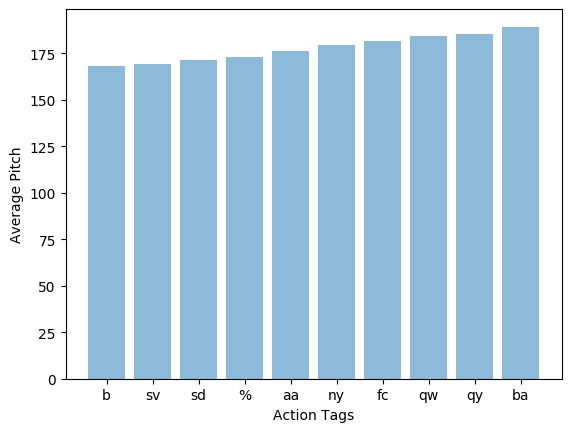

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('b', 'sv', 'sd', '%', 'aa', 'ny', 'fc', 'qw', 'qy', 'ba')
y_pos = np.arange(len(objects))
performance = [168.05149051888097, 169.25885798766845, 171.70153291031446, 172.90590190997065, 176.06286116054955, 179.591131201695, 181.52682926263083, 184.52268256643057, 185.53139870917684, 189.36675813929455]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Pitch')
plt.xlabel('Action Tags')
#plt.title('Action Tag')

plt.show()

In [94]:
list_actions = list(speech_df_train['act_tag'])
mean_speaking_list = list(speech_df_train['Speaking Rate'])

In [95]:
import collections
meanSpeaking_dict = collections.defaultdict(list)
for i in range(0,len(list_actions)):
    meanSpeaking_dict[list_actions[i]].append(mean_speaking_list[i])
print(meanSpeaking_dict)

defaultdict(<class 'list'>, {'qy': [2.8061224489795915, 3.5, 3.125, 4.411764705882494, 3.0769230769230766, 2.9411764705882364, 5.6034482758620845, 10.655737704918042, 3.632478632478627, 7.0, 5.3571428571428354, 1.9230769230769376, 3.7735849056603694, 5.681818181818211, 9.558823529411768, 4.3478260869565135, 2.5641025641025603, 1.6666666666666825, 3.767123287671224, 3.773584905660382, 4.8701298701298725, 4.255319148936181, 4.069767441860434, 5.405405405405391, 3.5211267605633765, 5.882352941176412, 7.432432432432483, 3.716216216216206, 8.333333333333265, 2.7566539923954383, 3.8732394366197136, 3.688524590163938, 3.6666666666666665, 2.7777777777777817, 4.310344827586206, 6.578947368421071, 4.6296296296295765, 1.4423076923076836, 3.658536585365853, 6.250000000000132, 3.214285714285701, 3.947368421052679, 4.807692307692345, 4.6052631578947265, 4.545454545454452, 4.615384615384575, 2.840909090909105, 2.7243589743589705, 3.282828282828284, 1.3888888888888908, 2.586206896551732, 3.75000000000

In [96]:
tags = []
averages_list = []

for key, value in meanSpeaking_dict.items():
    tags.append(key)
    averages_list.append(np.nansum(value)/len(value))
print(tags)
print(averages_list)

['qy', 'sd', '%', 'b', 'sv', 'qw', 'aa', 'ny', 'ba', 'fc']
[4.347765261096667, 3.966916133174984, 3.5248423650417977, 2.57024698001019, 3.95151952028529, 4.019685390550728, 3.031714760308014, 2.7513363228963086, 3.3645013426446897, 3.8586152843740127]


In [97]:
new_tags = [x for _,x in sorted(zip(averages_list,tags))]
print(new_tags)

['b', 'ny', 'aa', 'ba', '%', 'fc', 'sv', 'sd', 'qw', 'qy']


In [98]:
averages_list.sort()
print(averages_list)

[2.57024698001019, 2.7513363228963086, 3.031714760308014, 3.3645013426446897, 3.5248423650417977, 3.8586152843740127, 3.95151952028529, 3.966916133174984, 4.019685390550728, 4.347765261096667]


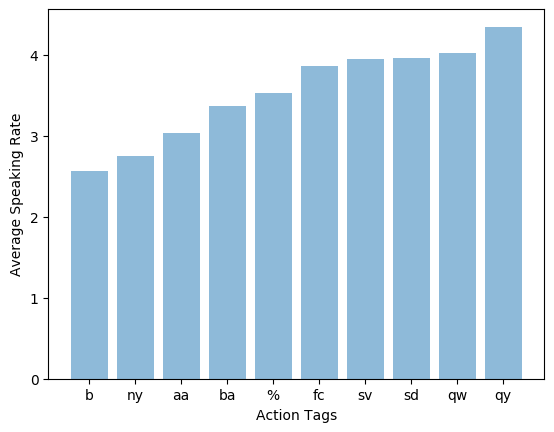

In [99]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('b', 'ny', 'aa', 'ba', '%', 'fc', 'sv', 'sd', 'qw', 'qy')
y_pos = np.arange(len(objects))
performance = [2.57024698001019, 2.7513363228963086, 3.031714760308014, 3.3645013426446897, 3.5248423650417977, 3.8586152843740127, 3.95151952028529, 3.966916133174984, 4.019685390550728, 4.347765261096667]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Speaking Rate')
plt.xlabel('Action Tags')
#plt.title('Action Tag')

plt.show()

In [23]:
speech_df_test = pd.read_csv('test_speech.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
speech_df_test = speech_df_test[speech_df_test.act_tag.notnull()]

In [25]:
speech_df_test = speech_df_test[['Mean Pitch', 'Sd Pitch', 'Min Intensity', 'Max Intensity',
       'Mean Intensity', 'Sd Intensity', 'Speaking Rate', 'Jitter', 'Shimmer',
       'HNR','act_tag']]X_train = text_df.copy()

In [26]:
speech_df_test = speech_df_test.loc[(speech_df_test.act_tag == 'sd') | (speech_df_test.act_tag == 'b') | (speech_df_test.act_tag == 'sv') | (speech_df_test.act_tag == 'aa')| (speech_df_test.act_tag == 'aa') | (speech_df_test.act_tag == '%') | (speech_df_test.act_tag == 'ba') | (speech_df_test.act_tag == 'qy') | (speech_df_test.act_tag == 'qw') | (speech_df_test.act_tag == 'ny') | (speech_df_test.act_tag == 'fc'),:]

In [27]:
speech_df_test.reset_index(drop=True)

Mean Pitch   Sd Pitch  Min Intensity  Max Intensity  Mean Intensity  \
0      242.702085  51.317889      32.139505      67.753107       59.900115   
1      211.966598  21.018339      32.199126      56.784547       49.460053   
2      269.953577  71.840399      32.201556      67.687772       58.992369   
3      174.003822  43.550257      32.084746      65.387555       58.278937   
4      199.628010  68.240214      31.609101      69.282554       58.313902   
...           ...        ...            ...            ...             ...   
26198  134.892929  28.507071      27.209686      57.710434       45.509569   
26199  118.911949  32.702491      23.605995      57.952344       43.676128   
26200  116.554341  10.799396      29.308262      57.281413       44.161800   
26201  108.260595  54.237578      29.709299      70.648072       61.271209   
26202   89.875703   8.615671      29.047143      71.506898       61.694962   

       Sd Intensity  Speaking Rate    Jitter   Shimmer        HNR act_tag  
0         10.663830       3.040541  0.017098  0.079819  13.976822      qw  
1          8.654500       1.136364  0.016760  0.189506   6.780977       b  
2          9.884943       2.358491  0.016914  0.059647  18.281000      sd  
3          9.846894       5.158730  0.020603  0.082211  13.333871      sd  
4         10.405368       3.947368  0.022023  0.084005  15.869942      sd  
...             ...            ...       ...       ...        ...     ...  
26198      8.091271       2.644231  0.012507  0.112223   6.418653      sd  
26199      6.791842       0.665984  0.014706  0.127096   5.779853      sv  
26200      6.931318       1.923077  0.016368  0.124731   6.113572      sd  
26201     13.664094       5.063291  0.024874  0.123727  12.836130      sv  
26202     13.877926       4.924242  0.023322  0.107141  12.414764      sv  

[26203 rows x 11 columns]

In [28]:
outcomes = list(speech_df_test['act_tag'])

In [29]:
del speech_df_test['act_tag']

In [30]:
from fastai.tabular import *

In [32]:
cat_names = []
cont_names = ['Mean Pitch', 'Sd Pitch', 'Min Intensity', 'Max Intensity',
       'Mean Intensity', 'Sd Intensity', 'Speaking Rate', 'Jitter', 'Shimmer',
       'HNR']
procs = [FillMissing, Categorify, Normalize]
test = TabularList.from_df(speech_df_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [33]:
dep_var = ['act_tag']

In [34]:
data = (TabularList.from_df(speech_df_train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.8, seed = 42)
                        .label_from_df(cols = dep_var)
                        .add_test(test)
                        .databunch(bs=512))

In [35]:
data.show_batch(rows=10)

In [36]:
learn = tabular_learner(data, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.4, callback_fns=ShowGraph)

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


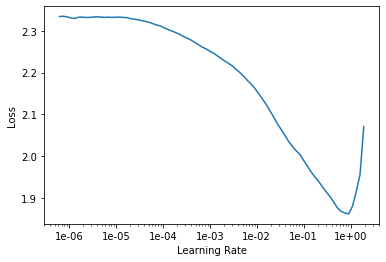

In [38]:
learn.recorder.plot()

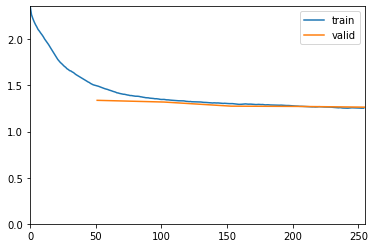

In [39]:
learn.fit_one_cycle(5, max_lr=slice(1e-01))

In [40]:
learn.save('Model1')

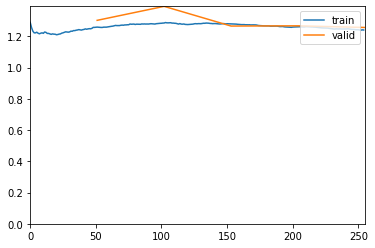

In [41]:
learn.fit_one_cycle(5, max_lr=slice(1e-01))

In [42]:
learn.save('Model2')

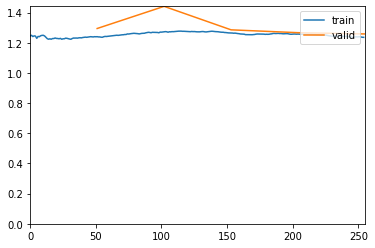

In [43]:
learn.fit_one_cycle(5, max_lr=slice(1e-01))

In [44]:
learn.load('Model2')

Learner(data=TabularDataBunch;

Train: LabelList (26362 items)
x: TabularList
Mean Pitch_na False; Sd Pitch_na False; Sd Intensity_na False; Jitter_na False; Shimmer_na False; HNR_na False; Mean Pitch -0.8386; Sd Pitch 0.0220; Min Intensity 0.1970; Max Intensity -0.6051; Mean Intensity -1.0089; Sd Intensity -0.4052; Speaking Rate -1.2500; Jitter -0.2371; Shimmer -0.3185; HNR 1.0720; ,Mean Pitch_na False; Sd Pitch_na False; Sd Intensity_na False; Jitter_na False; Shimmer_na False; HNR_na False; Mean Pitch 0.0623; Sd Pitch 0.4587; Min Intensity 0.0414; Max Intensity -0.6478; Mean Intensity -0.8948; Sd Intensity -0.2661; Speaking Rate -0.4630; Jitter 0.2964; Shimmer 0.2602; HNR 0.5046; ,Mean Pitch_na False; Sd Pitch_na False; Sd Intensity_na False; Jitter_na False; Shimmer_na False; HNR_na False; Mean Pitch -0.0239; Sd Pitch -0.8223; Min Intensity -0.1051; Max Intensity -0.1028; Mean Intensity 0.0479; Sd Intensity 0.9523; Speaking Rate -1.0305; Jitter -0.1608; Shimmer -1.0783; HNR 1.2500;

In [45]:
preds, targets = learn.get_preds(DatasetType.Test)

In [46]:
print(data.classes)

['%', 'aa', 'b', 'ba', 'fc', 'ny', 'qw', 'qy', 'sd', 'sv']


In [47]:
classes = list(data.classes)

In [48]:
predictions_list = []

for i in range(0,len(preds)):
    index_max = np.argmax(preds[i])
    predictions_list.append(classes[index_max])
    
print(predictions_list)

['sd', 'b', 'sd', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'b', 'sd', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'b', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'b', 'sd', 'b', 'b', 'b', 'b', 'sd', 'sd', 'b', 'b', 'b', 'b', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'sd', 'b', 'b', 'b', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'b', 'b', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'b', 'b', 'sd', 'sd', 'b', 'b', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'sd', 'sd', 'sd', 'b', 'sd', 'sd', 'sd', 'b', 'sd', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'b', 'sd', 'b', 'sd', 'b', 'sd', 'b', 'sd',

In [49]:
print(len(outcomes))

26203


In [50]:
print(len(predictions_list))

26203


In [51]:
test_size = len(predictions_list)

In [52]:
count_match = 0
for i in range(0,len(predictions_list)):
    if predictions_list[i] == outcomes[i]:
        count_match+=1
print(count_match)

15492


In [53]:
accuracy = (count_match/test_size)*100

In [54]:
print(accuracy)

59.12300118307064


In [100]:
from sklearn.metrics import f1_score
print(f1_score(outcomes, predictions_list, average = 'weighted'))

0.46708816308329


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
def precision_recall(label, predictions, value):
    """Calculates precision and recall for predictions made by the model."""
    TP, FP, FN = 0, 0, 0

    for i in range(len(label)):
        if label[i] == value and predictions[i] == value:
            TP += 1
        elif label[i] != value and predictions[i] == value:
            FP += 1
        elif label[i] == value and predictions[i] != value:
            FN += 1

    return TP / ( TP + FP ), TP / ( TP + FN )

In [56]:
def plot_confusion_matrix(y_true, y_pred, classes,cmap=plt.cm.Blues):
    """Returns a confusion matrix."""
    title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set( xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='True label',
            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

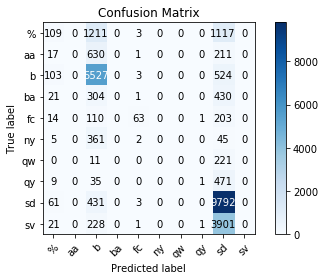

For % - 
Precision =  0.30277777777777776
Recall =  0.04467213114754098
F1 Score =  0.07785714285714286


For b - 
Precision =  0.6246609403254972
Recall =  0.8976774403118402
F1 Score =  0.7366877707430856


For fc - 
Precision =  0.8181818181818182
Recall =  0.16112531969309463
F1 Score =  0.2692307692307692


For qy - 
Precision =  0.3333333333333333
Recall =  0.001937984496124031
F1 Score =  0.0038535645472061652


For sd - 
Precision =  0.578894472361809
Recall =  0.9518810148731408
F1 Score =  0.7199470627159766




In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(outcomes, predictions_list, classes)
plt.show()

for index, key in enumerate(classes):
    #print(key)
    if key!='ny' and key!= 'qw' and key!= 'ba' and key!= 'aa' and key!= 'sv':
        precision, recall = precision_recall(outcomes, predictions_list, key)
        print('For ' + key + ' - ')
        print('Precision = ', precision)
        print('Recall = ', recall)
        print('F1 Score = ',(2 * precision * recall) / (precision + recall))
        print('\n')

In [62]:
X_train = speech_df_train.copy()

In [64]:
Y_train = speech_df_train['act_tag']

In [65]:
del X_train['act_tag']

In [66]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
X_train_scaled = scaler.transform(X_train)

In [68]:
xgb = XGBClassifier().fit(X_train_scaled, Y_train)

In [70]:
X_test_scaled = scaler.transform(speech_df_test)

In [71]:
xgb.score(X_test_scaled, outcomes)

0.5757356027935733

In [72]:
predictions_xgboost = list(xgb.predict(X_test_scaled))

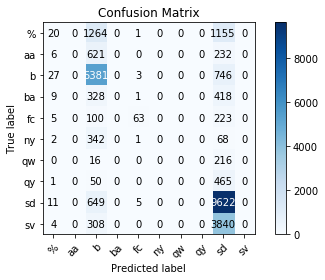

In [73]:
plot_confusion_matrix(outcomes, predictions_xgboost, classes)
plt.show()

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#plot_confusion_matrix(outcomes, predictions_list, classes)
#plt.show()

for index, key in enumerate(classes):
    #print(key)
    if key!='ny' and key!= 'qw' and key!= 'ba' and key!= 'aa' and key!= 'sv' and key!= 'qy' :
        precision, recall = precision_recall(outcomes, predictions_list, key)
        print('For ' + key + ' - ')
        print('Precision = ', precision)
        print('Recall = ', recall)
        print('F1 Score = ',(2 * precision * recall) / (precision + recall))
        print('\n')

For % - 
Precision =  0.30277777777777776
Recall =  0.04467213114754098
F1 Score =  0.07785714285714286


For b - 
Precision =  0.6246609403254972
Recall =  0.8976774403118402
F1 Score =  0.7366877707430856


For fc - 
Precision =  0.8181818181818182
Recall =  0.16112531969309463
F1 Score =  0.2692307692307692


For sd - 
Precision =  0.578894472361809
Recall =  0.9518810148731408
F1 Score =  0.7199470627159766


